<a href="https://colab.research.google.com/github/mvm1964/MGVB/blob/main/danon_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
print(f"Using {device} device")

Using cuda device


In [2]:
# prompt: create a torch neural net class with two hided layers and a single continuous node in the output layer

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, hidden_size4),
            nn.ReLU(),
            nn.Linear(hidden_size4, 1) # Single continuous output node
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [6]:
# prompt: create pandas dataframe with 20 continuous columns and 1000 rows filled with random numbers from 0 to 1

import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Create a DataFrame with 20 continuous columns and 1000 rows
#data = np.random.rand(1000, 20)
#df = pd.DataFrame(data)

df = pd.read_csv('/content/drive/My Drive/rf_data_ingredients.csv')
#df = pd.get_dummies(df.drop('barcode', axis=1), dtype=int)
df = pd.get_dummies(df, dtype=int)
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,new_ingr_data.avg_h,GOS.SYRUP,SUNFLOWER.OIL..HIGH.OLEIC.ACID.,CITRIC.ACID,SKIMMED.MILK.CONCENTRATE.26..NON.SEASONAL,STARCH.POTATO.FRACTION..IMPROVED,VITAMIN.A.PALMITATE,LACTOSE.EDIBLE.LOW.VIT.B2,CHOLINE.CHLORIDE,CALCIUM.CARBONATE.FINE,...,LACTOSE.EDIBLE.VITAMIN.B2,VITAMIN.B6..PIRIDOXIN.HYDROCHLORIDE.100..,COPPER.SULPHATE.PENTAHYDRATE,new_ingr_data.Supply.point_FULDA,new_ingr_data.Supply.point_HAPS,new_ingr_data.Supply.point_MCR1,new_ingr_data.Supply.point_MCR2,new_ingr_data.Supply.point_OPO,new_ingr_data.Supply.point_STV,new_ingr_data.Supply.point_WXF
0,10.000000,12.500000,1.546670,0.000014,48.645120,0.000,0.001145,10.867080,0.159882,0.200342,...,0.0,0.000317,0.000000,1,0,0,0,0,0,0
1,31.666667,11.931231,0.369676,0.000032,70.788155,0.000,0.001417,20.818125,0.174619,0.264260,...,0.0,0.000355,0.000000,1,0,0,0,0,0,0
2,35.185185,12.253610,1.261299,0.000044,95.458320,0.000,0.001460,16.195573,0.198971,0.251635,...,0.0,0.000353,0.000000,1,0,0,0,0,0,0
3,50.076336,7.354657,12.007250,0.000000,62.346861,0.000,0.001182,21.587329,0.205011,0.000000,...,0.0,0.000511,0.000000,1,0,0,0,0,0,0
4,35.000000,0.000000,3.337473,0.000000,0.000000,0.000,0.001253,0.000000,0.217177,0.000000,...,0.0,0.000358,0.000000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,20.000000,7.354657,12.007250,0.000242,0.000000,0.000,0.001182,21.587329,0.205011,0.000000,...,0.0,0.000511,0.003214,0,0,0,0,0,0,1
160,0.000000,0.000000,0.000000,0.004982,0.000000,32.927,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.050606,0,0,0,0,0,0,1
161,0.000000,0.000000,0.000000,0.004510,0.000000,21.781,0.000000,0.000000,0.000000,0.000000,...,0.0,0.133871,0.025234,0,0,0,0,0,0,1
162,30.000000,16.539057,5.308996,0.000920,0.000000,0.000,0.001532,6.199546,0.035981,0.367103,...,0.0,0.000735,0.000000,0,0,0,0,0,0,1


In [42]:
model = NeuralNetwork(input_size=65, hidden_size1=7, hidden_size2=7, hidden_size3=7, hidden_size4=7).to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=65, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=7, bias=True)
    (5): ReLU()
    (6): Linear(in_features=7, out_features=7, bias=True)
    (7): ReLU()
    (8): Linear(in_features=7, out_features=1, bias=True)
  )
)


In [43]:
# Read data, convert to NumPy arrays
X = df.iloc[:, 2:67].values
y = df.iloc[:, 1].values

#device = torch.device("cpu")

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32, device=device)
y = torch.tensor(y, dtype=torch.float32, device=device).reshape(-1, 1)

# create DataLoader, then take one batch
#loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=8)



In [63]:
import torch.optim as optim
from sklearn.model_selection import train_test_split
# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=14)

# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=16)


In [64]:
# train
n_epochs = 300
loss_fn = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.1)
optimizer = optim.Adam(model.parameters(), lr=0.00001)
model.train()
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)



In [65]:
from sklearn.metrics import r2_score
y_t = y_test.cpu()
y_p = y_pred.cpu()
r2 = r2_score(y_t.detach().numpy(), y_p.detach().numpy())
print("R^2 score: %.2f" % r2)

#acc = (y_pred.round() == y_test).float().mean()
#acc = float(acc)
#print("Model accuracy: %.2f%%" % (acc*100))

R^2 score: 0.84


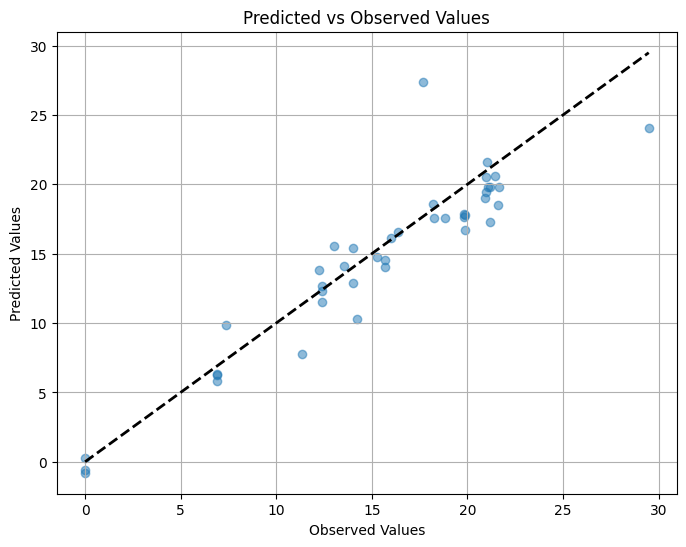

In [59]:
# prompt: plot predicted versus observed values of the above ANN model and save the plot to png file on Drive

import matplotlib.pyplot as plt

# Assuming y_t and y_p are already defined from the previous code
plt.figure(figsize=(8, 6))
plt.scatter(y_t.detach().numpy(), y_p.detach().numpy(), alpha=0.5)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values')
plt.plot([y_t.min(), y_t.max()], [y_t.min(), y_t.max()], 'k--', lw=2) # Add a diagonal line
plt.grid(True)

# Save the plot to Google Drive
plt.savefig('/content/drive/My Drive/CUDA/foam_height_predicted_vs_observed_75train.png')

plt.show()
